<a href="https://colab.research.google.com/github/dy018/project105/blob/main/105_ML_project_song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITI105 Machine Learning Project

Team members:
* Lye Suh Jeng (7487427Y)
* Lee Li Neng (6203055B)
* Lim Chan Boon (9704541M)
---
Project Problem: 4 (a) as in suggested project:
* The success of the song can often been measured by whether the song is on the Hit Chart such as Billboard Hot 100. It is important for music labels to know what makes a song successful so that they can focus their budget on making songs that has the highest chance of being successful.
---
We want to solve the problem statement by using the follow steps:
1.   Load dataset
2.   Discover & visualize data to gain insights
3.   Prepare data
4.   Split data into train and test datasets
5.   Feature scaling
6.   Train Base Models using the following algorithms:
      * Multiple Linear Regression (MLR)
      * Polynomial Regression (PR)
      * Elastic Net Regression (ENR)
      * Decision Tree Regressor (DTR)
7. Evaluate the performance of the base models using test data
8. Perform stacking on base model and evaluate performance
9. Deploy the model

# (1) Gather and Load dataset

In [113]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/dy018/project105/main/song_data.csv')

# (2) Discover & visualize data to gain insights

In [114]:
print(">>> Display first 5 records:\n")
df.head()

>>> Display first 5 records:



,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [115]:
print(">>> Check data for any missing data and if any non-numeric data:\n")
df.info()

>>> Check data for any missing data and if any non-numeric data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(

In [116]:
# Observation from df.info(): There is no missing data and all columns are numeric number except song_name

# Drop song_name since it's not feature to determine song popularity
df.drop(['song_name'], axis=1, inplace=True)

print(">>> Display first 5 records:\n")
df.head()

>>> Display first 5 records:



,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [117]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

* audio_mode, time_signature and key most likely are categorical features. The rest are numeric features

In [118]:
# song_popularity is target. The rest of columns are features
# Get list of features from df
features = df.columns[1:].tolist()

# put features into 2 types: categorical features and numeric features
category_features = ['audio_mode', 'time_signature', 'key']
numeric_features = [feature for feature in features if feature not in category_features]
print(">>> Categorical features are:", category_features)
print(">>> Numeric features are:", numeric_features)


>>> Categorical features are: ['audio_mode', 'time_signature', 'key']
>>> Numeric features are: ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


In [119]:
# Study each columns in df
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


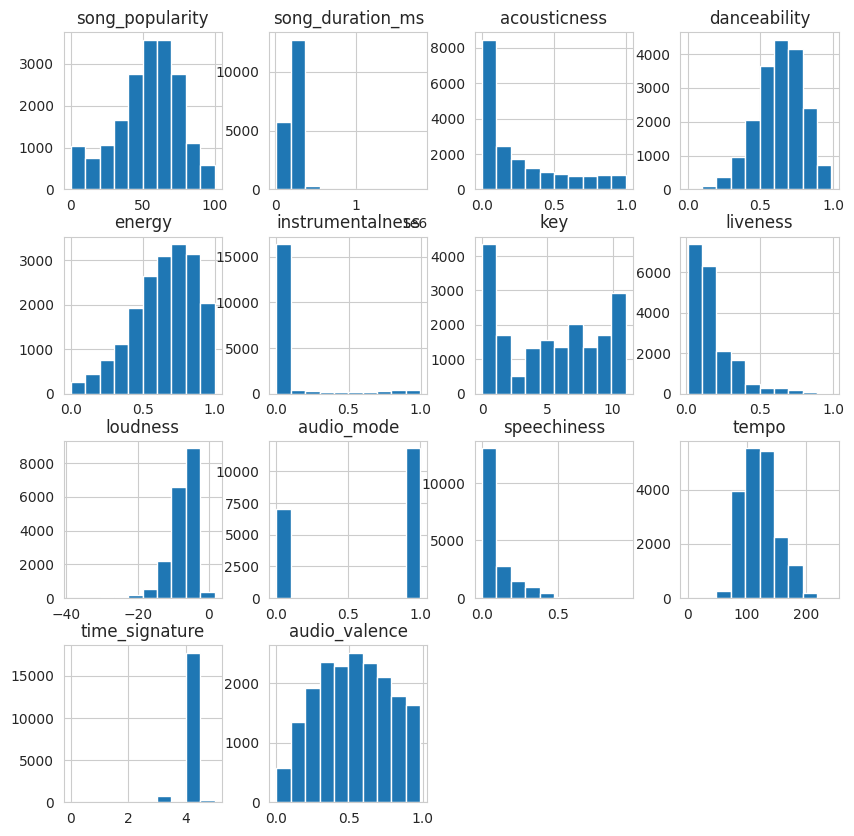

In [120]:
# Plot histograms for df to see data distribution

import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()


* Target = Song_popularity (Popularity score from 0 to 100 with 100 as the most popular song).
* Base on the histogram, the song_popularity is well spreaded bell curve from 0 to 100.

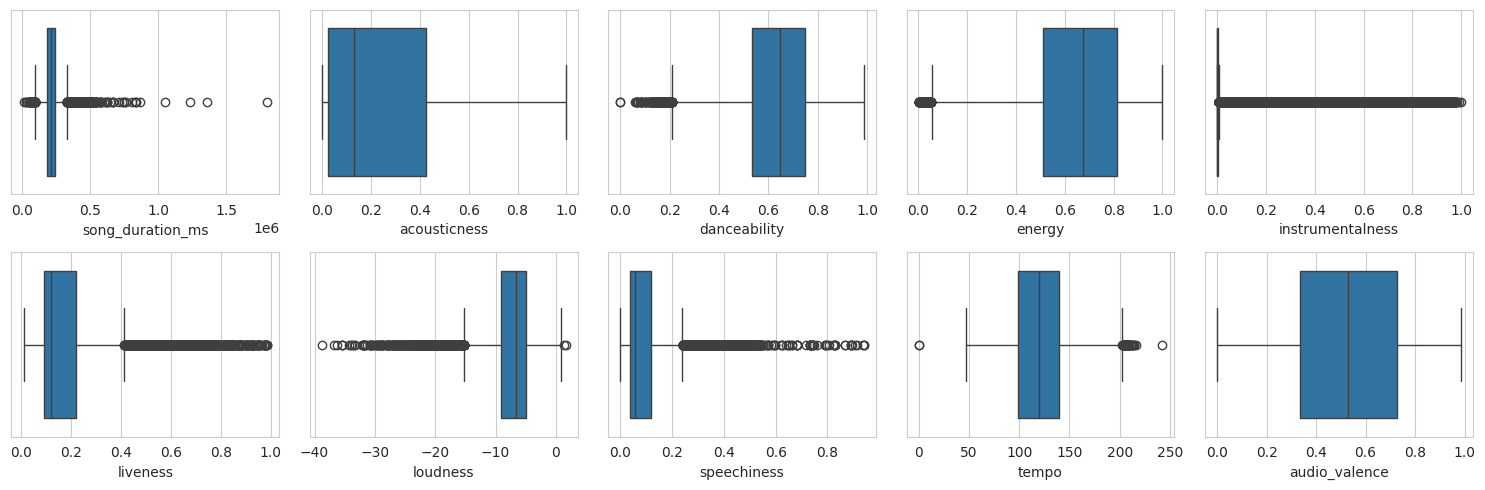

In [121]:
# Plot boxplot for numeric features
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df[feature], ax=axs[i // 5, i % 5])

# Adjust the layout so that the plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()


* Observation from boxplots:
** song_duration_ms, danceability, energy, liveness, loudness and speechiness and tempo seem to have outliers

# (3) Prepare data
## (3)(a) Prepare data by removing any duplicat records if any

In [80]:
# Backup original df
df_original = df.copy()

In [122]:
# Remove duplicate rows (if any)

counter = 0
row,col = df.shape

df.drop_duplicates(inplace=True)

if df_original.shape==(row,col):
    print('>>> The dataset doesn\'t have any duplicates')
else:
    print('>>> Number of duplicates dropped/fixed:', {row-df.shape[0]})
    print(">>> df's shape after removing dupliate rows", df.shape)

>>> Number of duplicates dropped/fixed: {3911}
>>> df's shape after removing dupliate rows (14924, 14)


## (3)(b) Convert categorical features to numeric using dummy encoding

In [132]:
# backup df:
df1 = df.copy()

# Convert categorical features to numeric using dummy encoding
for feature in category_features:
    dummies = pd.get_dummies(df[feature], prefix=feature)
    df1 = pd.concat([df, dummies], axis=1)
    df1.drop(feature, axis=1, inplace=True)

print(">>> df's shape after converting categorical features to numeric using dummy encoding:\n", df1.shape)
print(">>> Columns in new df:\n", df1.columns)
print(">>> First 5 records in new df:\n", df1.head())

>>> df's shape after converting categorical features to numeric using dummy encoding:
 (14924, 25)
>>> Columns in new df:
 Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')
>>> First 5 records in new df:
    song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  l

## (3)(b) Remove outliers


In [150]:
# backup df
df2 = df1.copy()

# remove outliners that is outside 60% of IQR for both Q1 and Q3 ends respectively
for i in numeric_features:
  Q1 = df2[i].quantile(0.25)
  Q3 = df2[i].quantile(0.75)
  IQR = Q3 - Q1
  df2 = df2[df2[i] <= (Q3+(1.6*IQR))]
  df2 = df2[df2[i] >= (Q1-(1.6*IQR))]
  df2 = df2.reset_index(drop=True)

print(">>> df's shape after removing outliers:\n", df2.shape)
print(">>> Number of outliers that was removed\n", df1.shape[0] - df2.shape[0])

>>> df's shape after removing outliers:
 (9236, 25)
>>> Number of outliers that was removed
 5688


# 4) Split data into train and test datasets

In [151]:
from sklearn.model_selection import train_test_split

Y = df2['song_popularity']
X = df2.drop(['song_popularity'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=40)
X_train.reset_index(drop=True,inplace=True)

print(">>> Size of trainig set: ", X_train.shape)
print(">>> Size of testing set: ", X_test.shape)

>>> Size of trainig set:  (7388, 24)
>>> Size of testing set:  (1848, 24)


# 5) Feature scaling

In [152]:
# Apply scaling on columns of df
from sklearn.preprocessing import MinMaxScaler

def scaler(temp_df):
  # Initialize the MinMaxScaler
  min_max_scaler = MinMaxScaler()

  # Fit the scaler to the data and transform it
  min_max_scaled_data = min_max_scaler.fit_transform(temp_df)

  temp_df = pd.DataFrame(min_max_scaled_data, columns=temp_df.columns)
  return temp_df

X_train = scaler(X_train)
X_test = scaler(X_test)

print (">>> Display first 5 records of training data after scaling:\n")
X_train.head()

>>> Display first 5 records of training data after scaling:



,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.448727,0.225378,0.782554,0.752299,0.000786,0.290780,0.586992,1.0,0.728715,0.296571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.344131,0.700507,0.766119,0.512960,0.000000,0.120567,0.558757,1.0,0.139399,0.357653,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.428350,0.019286,0.581542,0.780518,0.000000,0.711736,0.589635,1.0,0.099750,0.492519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.308400,0.997970,0.677623,0.040761,0.000000,0.421185,0.013473,1.0,0.040902,0.547551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.926417,0.009834,0.504425,0.608069,0.122209,0.386868,0.498485,0.0,0.101836,0.594502,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
print (">>> Display df's statistic after scaling:\n")
X_train.describe()

>>> Display df's statistic after scaling:



,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,...,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000,7388.000000
mean,0.490599,0.253353,0.559835,0.649825,0.055827,0.326764,0.505295,0.647943,0.219356,0.463435,...,0.094342,0.027612,0.070655,0.086086,0.066865,0.114645,0.076205,0.099215,0.067136,0.082160
std,0.166798,0.274091,0.186163,0.204053,0.158102,0.212949,0.177332,0.477644,0.235351,0.186580,...,0.292324,0.163870,0.256265,0.280509,0.249805,0.318615,0.265343,0.298971,0.250274,0.274627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380603,0.028220,0.438685,0.509824,0.000000,0.179593,0.402485,0.000000,0.058013,0.322637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.478615,0.140099,0.570164,0.676003,0.000304,0.245024,0.538967,1.000000,0.121870,0.458648,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.586345,0.414211,0.694058,0.812918,0.013866,0.425761,0.636305,1.000000,0.283806,0.581758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6.  Train Models

* The following algorithms are used in training models:
** Polynomial Regression (PR)
** Elastic Net Regression (ENR)
** Decision Tree Regressor (DTR)

## Model Evaluation Functions

In [228]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# calculates r2_score
def cal_r2(y_true, y_pred):
  r2 = r2_score(y_true, y_pred)
  return(round(r2,2))

# Calculates adjusted_r2
def cal_adj_r2(x_df, r2):
  number_variables = x_df[1] - 1
  adjusted_r2 = 1 - ((1-r2) * (x_df[0]-1)) / (x_df[0] - number_variables -1)
  return(round(adjusted_r2,2))

def cal_mse(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return(round(mse,2))

def cal_performance(x_train_shape, x_test_shape, y_train, y_train_pred, y_test, y_test_pred):
  r2_train = cal_r2(y_train, y_train_pred)
  r2_test = cal_r2(y_test, y_test_pred)
  adj_r2_train = cal_adj_r2(x_train_shape, r2_train)
  adj_r2_test = cal_adj_r2(x_test_shape, r2_test)
  mse_train = cal_mse(y_train, y_train_pred)
  mse_test = cal_mse(y_test, y_test_pred)

  performance_dict = {
    'r2_train': r2_train,
    'r2_test': r2_test,
    'adj_r2_train': adj_r2_train,
    'adj_r2_test': adj_r2_test,
    'mse_train': mse_train,
    'mse_test': mse_test
    }
  return performance_dict

6a) Polynomial Regression (PR)

In [229]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# specify degree of 3 for polynomial regression model
# include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_train_features = poly.fit_transform(X_train)
poly_test_features = poly.fit_transform(X_test)

# Create LinearRegression
pr = LinearRegression()

# train the model
pr.fit(poly_train_features, y_train)

pr_pred_train = pr.predict(poly_train_features)
pr_pred_test = pr.predict(poly_test_features)

In [230]:
pr_performance = cal_performance(X_train.shape, X_test.shape, y_train, pr_pred_train, y_test, pr_pred_test)
print(pr_performance)

{'r2_train': 0.21, 'r2_test': -0.53, 'adj_r2_train': 0.21, 'adj_r2_test': -0.55, 'mse_train': 334.81, 'mse_test': 674.6}


## 6a) Multiple Linear Regression (mlr)

In [231]:

# Create LinearRegression
mlr = LinearRegression()
mlr = LinearRegression().fit(X_train, y_train)
mlr_pred_train = mlr.predict(X_train)
mlr_pred_test = mlr.predict(X_test)

In [232]:
mlr_performance = cal_performance(X_train.shape, X_test.shape, y_train, mlr_pred_train, y_test, mlr_pred_test)
print(mlr_performance)

{'r2_train': 0.03, 'r2_test': 0.03, 'adj_r2_train': 0.03, 'adj_r2_test': 0.02, 'mse_train': 410.39, 'mse_test': 428.75}
